In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['DF_ALL.csv', 'sample.csv', 'DFALL.NS.csv']


In [2]:
#from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_all = pd.read_csv("../input/DF_ALL.csv", index_col = 0)

In [4]:
close = df_all[[ 'hcl', 'infy', 'yes']]


In [5]:
close.describe()

,hcl,infy,yes
count,1049.000000,1049.000000,1049.000000
mean,784.693670,972.546704,184.620782
std,150.827836,148.996514,89.989052
min,342.125000,553.000000,45.169998
25%,733.400024,898.299988,109.529999
50%,823.049988,984.349976,162.220001
75%,871.700012,1083.750000,264.130005
max,1032.849976,1267.599976,377.049988


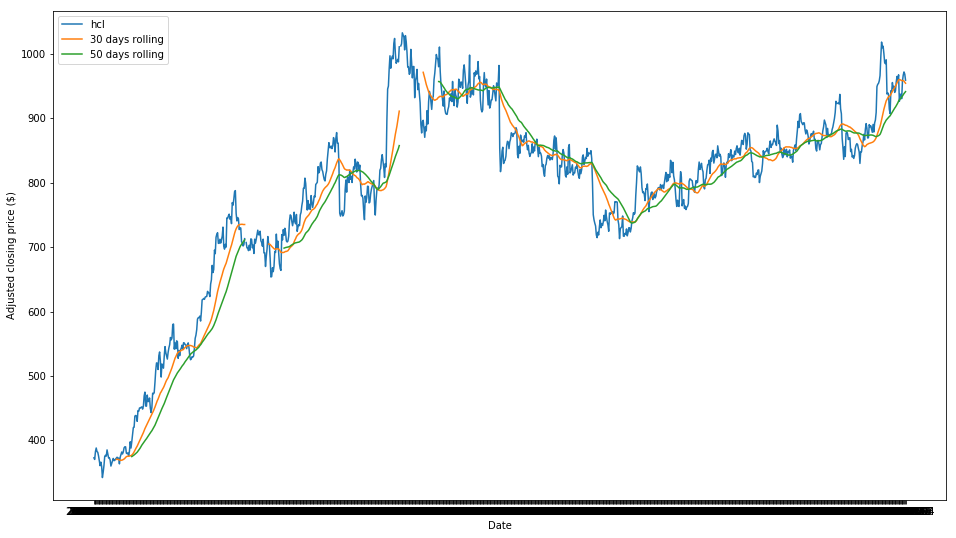

In [6]:
# Get the HCL timeseries. This now returns a Pandas Series object indexed by date.
hcl = close.loc[:, 'hcl']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_hcl = hcl.rolling(window=30).mean()
long_rolling_hcl = hcl.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(hcl.index, hcl, label='hcl')
ax.plot(short_rolling_hcl.index, short_rolling_hcl, label='30 days rolling')
ax.plot(long_rolling_hcl.index, long_rolling_hcl, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

data = close
# Calculating the short-window moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head()


,hcl,infy,yes
Date,,,
2013-04-04,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN


In [8]:
# Calculating the short-window moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,hcl,infy,yes
Date,,,
2018-03-23,904.113500,1030.515997,326.962198
2018-03-26,904.889500,1032.941497,326.235498
2018-03-27,905.907000,1035.385997,325.499999
2018-03-28,906.748499,1037.720997,324.941999
2018-04-04,907.600499,1040.009497,324.400499


In [9]:
# Relative returns
returns = data.pct_change(1)
returns.head()

,hcl,infy,yes
Date,,,
2013-04-04,NaN,NaN,NaN
2013-04-09,-0.006707,-0.039478,-0.005388
2013-04-10,0.033086,0.017820,0.009186
2013-04-12,0.014510,-0.184327,0.032909
2013-04-15,-0.014367,0.018463,0.034685


In [10]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(data).diff()
log_returns.head()

,hcl,infy,yes
Date,,,
2013-04-04,NaN,NaN,NaN
2013-04-09,-0.006730,-0.040279,-0.005403
2013-04-10,0.032550,0.017663,0.009144
2013-04-12,0.014406,-0.203742,0.032379
2013-04-15,-0.014471,0.018295,0.034097


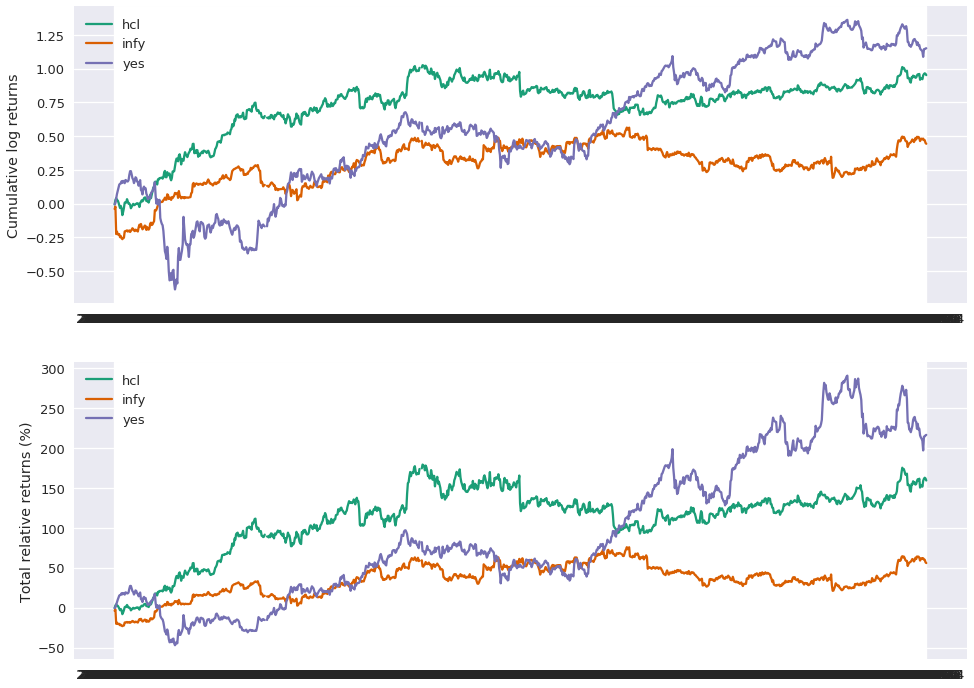

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [12]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

Date,2018-04-04
hcl,-0.009700
infy,-0.006738
yes,0.001966


In [13]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 3, index=r_t.index, columns=r_t.columns)
weights_vector

Date,2018-04-04
hcl,0.333333
infy,0.333333
yes,0.333333


In [14]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

Date,2018-04-04
Date,
2018-04-04,-0.004824


In [15]:
weights_matrix = pd.DataFrame(1 / 3, index=data.index, columns=data.columns)
weights_matrix.tail()

,hcl,infy,yes
Date,,,
2018-03-23,0.333333,0.333333,0.333333
2018-03-26,0.333333,0.333333,0.333333
2018-03-27,0.333333,0.333333,0.333333
2018-03-28,0.333333,0.333333,0.333333
2018-04-04,0.333333,0.333333,0.333333


In [16]:
log_returns.head()

,hcl,infy,yes
Date,,,
2013-04-04,NaN,NaN,NaN
2013-04-09,-0.006730,-0.040279,-0.005403
2013-04-10,0.032550,0.017663,0.009144
2013-04-12,0.014406,-0.203742,0.032379
2013-04-15,-0.014471,0.018295,0.034097


In [17]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

Date,2013-04-04,2013-04-09,2013-04-10,2013-04-12,2013-04-15
Date,,,,,
2013-04-04,NaN,-0.01747,0.019786,-0.052319,0.012641
2013-04-09,NaN,-0.01747,0.019786,-0.052319,0.012641
2013-04-10,NaN,-0.01747,0.019786,-0.052319,0.012641
2013-04-12,NaN,-0.01747,0.019786,-0.052319,0.012641
2013-04-15,NaN,-0.01747,0.019786,-0.052319,0.012641


In [18]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

Date
2018-03-23   -0.001938
2018-03-26    0.018674
2018-03-27    0.001523
2018-03-28   -0.006181
2018-04-04   -0.004824
dtype: float64

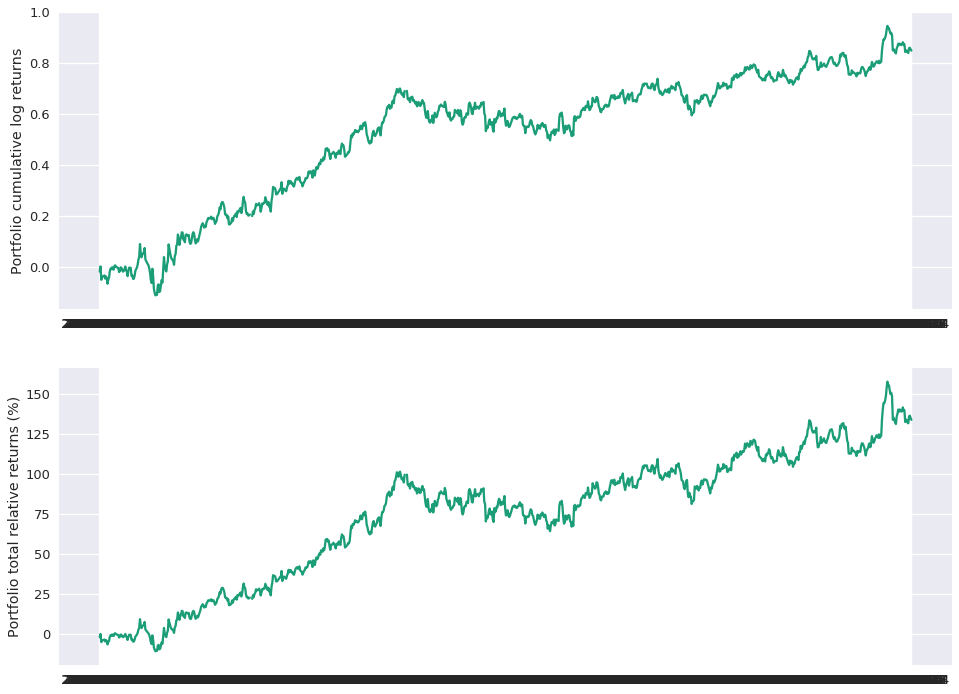

In [19]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()
    

In [20]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 133.72%
Average yearly return is: 23.37%


In [21]:
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

,hcl,infy,yes
Date,,,
2013-04-04,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN
2013-04-16,NaN,NaN,NaN
2013-04-17,NaN,NaN,NaN
2013-04-18,NaN,NaN,NaN
2013-04-22,NaN,NaN,NaN


In [22]:
# Calculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,hcl,infy,yes
Date,,,
2018-03-23,904.113500,1030.515997,326.962198
2018-03-26,904.889500,1032.941497,326.235498
2018-03-27,905.907000,1035.385997,325.499999
2018-03-28,906.748499,1037.720997,324.941999
2018-04-04,907.600499,1040.009497,324.400499


Text(0,0.5,'Price in $')

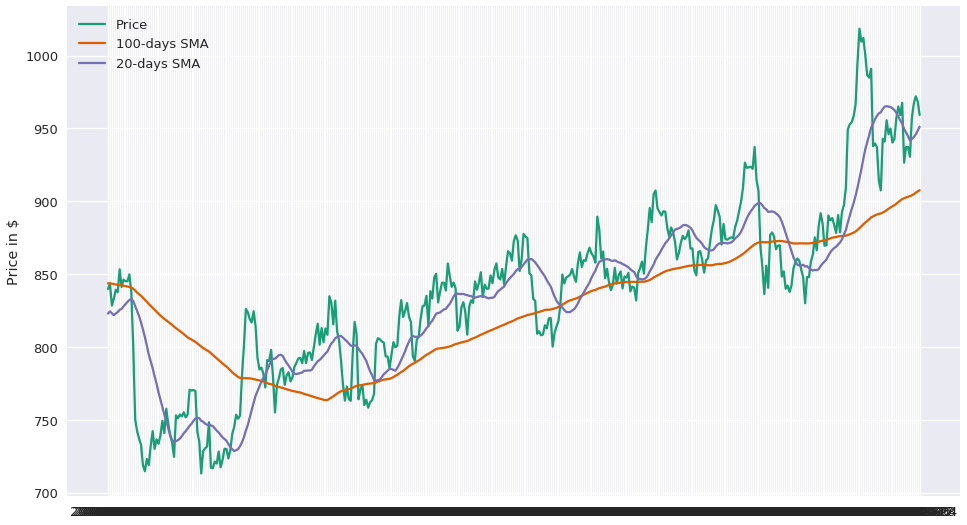

In [23]:
start_date = '2016-04-04'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'hcl'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'hcl'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'hcl'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
# ax.xaxis.set_major_formatter(my_year_month_fmt)

Text(0,0.5,'Price in $')

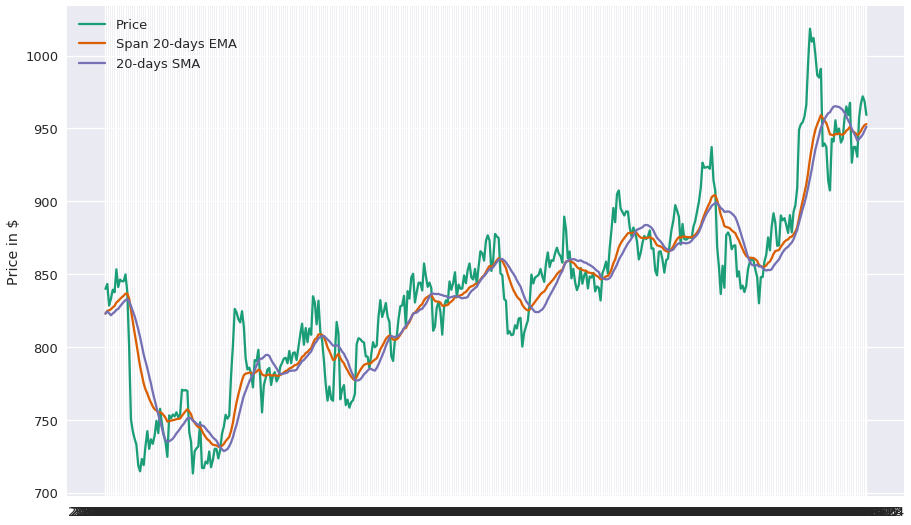

In [24]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'hcl'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'hcl'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'hcl'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
#ax.xaxis.set_major_formatter(my_year_month_fmt)

In [25]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,hcl,infy,yes
Date,,,
2018-03-23,11.029738,11.240472,-26.121162
2018-03-26,18.710207,-1.003837,-8.523898
2018-03-27,21.452092,-2.039186,-7.576389
2018-03-28,16.287596,-21.930648,-5.633394
2018-04-04,6.276894,-26.718294,-4.554018


In [26]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,hcl,infy,yes
Date,,,
2018-03-23,0.333333,0.333333,-0.333333
2018-03-26,0.333333,-0.333333,-0.333333
2018-03-27,0.333333,-0.333333,-0.333333
2018-03-28,0.333333,-0.333333,-0.333333
2018-04-04,0.333333,-0.333333,-0.333333


In [27]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

Text(0,0.5,'Trading position')

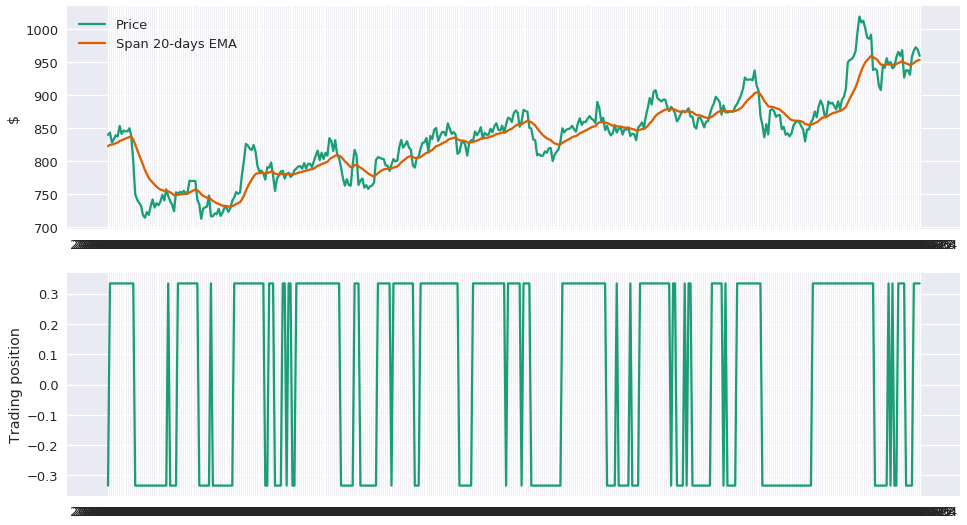

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'hcl'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'hcl'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
#ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'hcl'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
#ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [29]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns.head()

,hcl,infy,yes
Date,,,
2013-04-04,NaN,NaN,NaN
2013-04-09,-0.006730,-0.040279,-0.005403
2013-04-10,0.032550,0.017663,0.009144
2013-04-12,0.014406,-0.203742,0.032379
2013-04-15,-0.014471,0.018295,0.034097


In [30]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,hcl,infy,yes
Date,,,
2018-03-23,-0.009482,0.001803,0.013223
2018-03-26,0.003343,-0.003545,-0.018875
2018-03-27,0.001719,0.000361,-0.000165
2018-03-28,-0.001185,0.006475,-0.001479
2018-04-04,-0.003233,0.002246,-0.000655


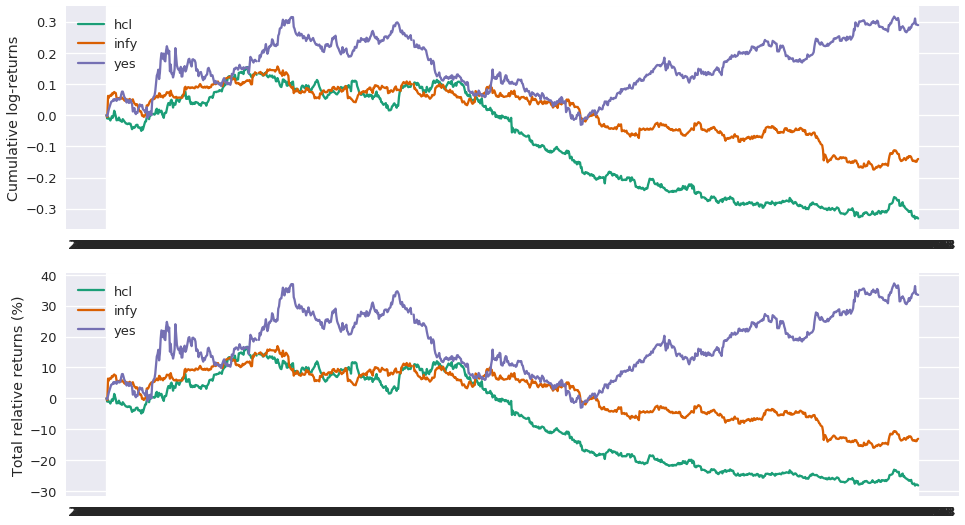

In [31]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
#ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
#ax2.xaxis.set_major_formatter(my_year_month_fmt)


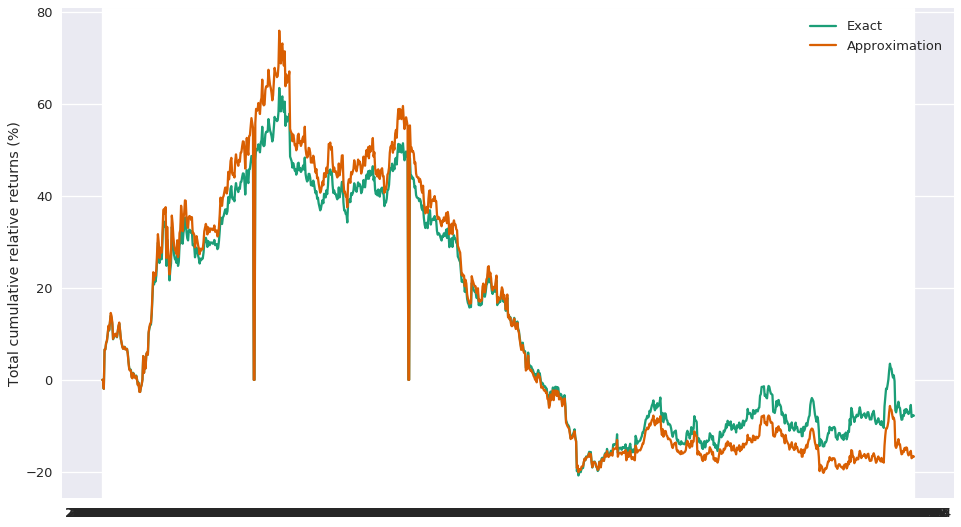

In [32]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
#ax.xaxis.set_major_formatter(my_year_month_fmt)

In [33]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: -7.80%
Average yearly return is: -1.99%


Total portfolio return is: 100.06%
Average yearly return is: 18.71%


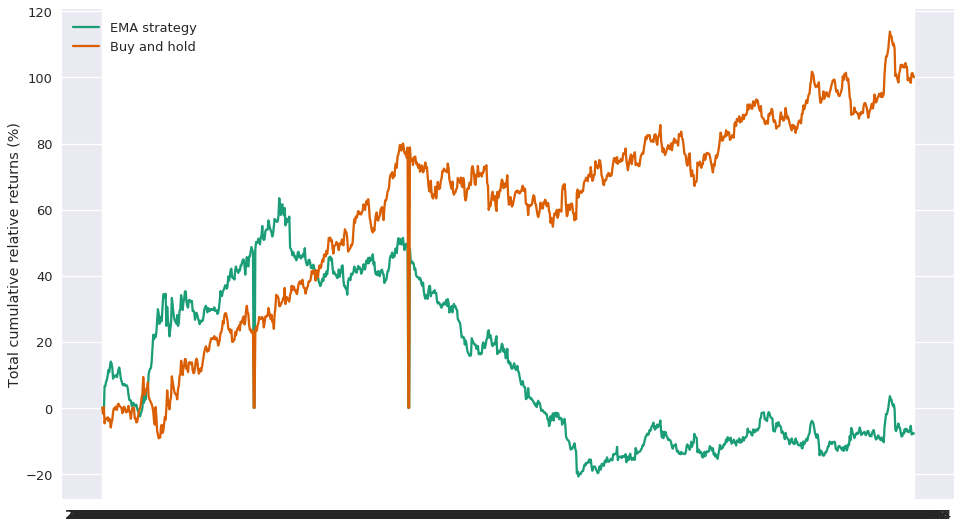

In [34]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/3, index = data.index, columns=data.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
#ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)
    